# Moneyball and Regression

![title](nba_stuff.jpg)

The story of  the Oakland A's and their use of analytics has become a pretty well known use case of the power of statistical anaylsis to gain a competitive advantage.  Many teams in the MLB and beyond have adopted these strategies, no longer to gain advantages, but to merely stay with the norm.

This brief analysis will display the power of linear regression and a simple implementation to show how teams from the NBA can use statistics to better leverage resources and make a run for the championship on a yearly basis.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

For this analysis, we'll have two data sets.  One will be our "training" set that will be used to build out our linear regression model.  Our second data set will the be "test" set to see how well our model performs on unseen data.  This data was taken from http://www.basketball-reference.com/.

Now let's read in the first data set and take a look.

In [6]:
nba = pd.read_csv("NBA_train.csv")

In [3]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


In [4]:
nba.describe()

,SeasonEnd,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
count,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000,835.000000
mean,1996.319760,0.574850,41.000000,8370.239521,8370.239521,3200.367665,6873.318563,2881.324551,5956.444311,319.043114,916.874251,1650.461078,2189.953293,1061.584431,2427.354491,1912.112575,668.364072,419.805988,1302.837126
std,9.243808,0.494662,12.740822,581.040114,587.543959,287.181266,401.027166,446.097941,830.596327,199.698941,523.982964,197.651728,244.491086,150.224519,130.671523,221.610925,93.393044,82.274913,153.973470
min,1980.000000,0.000000,11.000000,6901.000000,6909.000000,2565.000000,5972.000000,1981.000000,4153.000000,10.000000,75.000000,1189.000000,1475.000000,639.000000,2044.000000,1423.000000,455.000000,204.000000,931.000000
25%,1989.000000,0.000000,31.000000,7934.000000,7934.000000,2974.000000,6563.500000,2510.000000,5269.000000,131.500000,413.000000,1502.500000,2008.000000,953.500000,2346.500000,1735.000000,599.000000,359.000000,1192.000000
50%,1996.000000,1.000000,42.000000,8312.000000,8365.000000,3150.000000,6831.000000,2718.000000,5706.000000,329.000000,942.000000,1628.000000,2176.000000,1055.000000,2433.000000,1899.000000,658.000000,410.000000,1289.000000
75%,2005.000000,1.000000,50.500000,8784.500000,8768.500000,3434.500000,7157.000000,3296.000000,6753.500000,481.500000,1347.500000,1781.000000,2352.000000,1167.000000,2516.500000,2077.500000,729.000000,469.500000,1395.500000
max,2011.000000,1.000000,72.000000,10371.000000,10723.000000,3980.000000,8868.000000,3954.000000,7873.000000,841.000000,2284.000000,2388.000000,3051.000000,1520.000000,2753.000000,2575.000000,1053.000000,716.000000,1873.000000


A natural question to ask based on the information we have would be "how many wins does a team need in order to make the playoffs?".  If we were really stingy it may even be rephrased such that it gurantees making the playoffs.  However, such a threshold may be too high of a mark, so we'll just aim for a reasonable guess using some basic observations.

In [4]:
pd.crosstab(nba['W'], nba['Playoffs'])

Playoffs,0,1
W,,
11,2,0
12,2,0
13,2,0
14,2,0
15,10,0
16,2,0
17,11,0
18,5,0
19,10,0


Looking at the table above we can observe that every team with 49 or more wins made the playoffs.  Additionally, only a very small portion of teams with more than 41 wins did not make the playoffs.  

So this begs the question, "how does a team win games?".  Simple, a team must out score their opponent. There is a well known statistic in basketball known as "points differential" which captures how much a team outscores their opponenets over a season.  Points differential is known to be a strong indicator of team success and we will verify this with a scatter plot.

In [7]:
nba['PTSdiff'] = nba['PTS'] - nba['oppPTS']

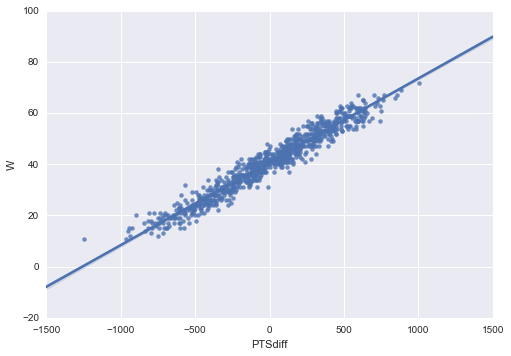

In [8]:
sns.regplot(x="PTSdiff", y="W", data=nba);

By plotting the PTSdiff on the x-axis and W on the y-axis, it is pretty clear there is a strong positive relationship between the two variables.

Next, we shall determine by how a team must outscore their opponets to make the playoffs.

\begin{equation}
Y = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n + \epsilon
\end{equation}

In [14]:
import statsmodels.api as sm

In [18]:
model = sm.OLS(nba.W, nba.PTSdiff)

In [19]:
res = model.fit()

In [20]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     75.38
Date:                Sat, 30 Apr 2016   Prob (F-statistic):           2.02e-17
Time:                        17:22:54   Log-Likelihood:                -4288.0
No. Observations:                 835   AIC:                             8578.
Df Residuals:                     834   BIC:                             8583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
PTSdiff        0.0326      0.004      8.682      0.0

In [22]:
from sklearn import linear_model

In [23]:
regr = linear_model.LinearRegression()

In [26]:
regr.fit(nba.PTSdiff.reshape(-1,1), nba.W)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print regr.intercept_

41.0


In [ ]:
res.